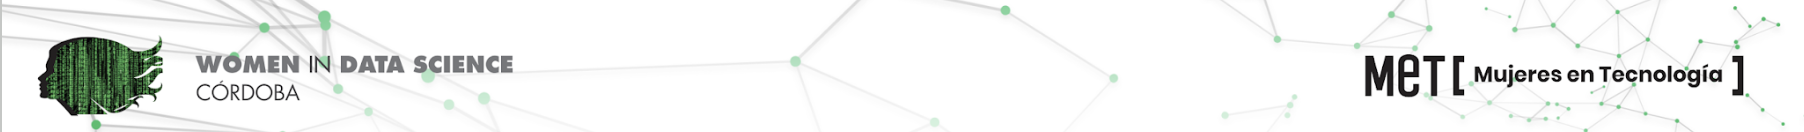

# EDA (Exploratory Data Analysis)


-------------------------------

## Librerías

In [ ]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression



import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
sns.set_style("white")
sns.set_palette("flare")

+info de styling:


*   https://seaborn.pydata.org/generated/seaborn.set_style.html
* https://seaborn.pydata.org/generated/seaborn.set_palette.html
*   https://www.codecademy.com/article/seaborn-design-i



## 01) Lectura de los datos

In [ ]:
%%time
df_SC = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQpeIbARTc5rOoeRG5lRqBB8e7TbV7VcH6Tgl7I0stqJtDIudoj_5rydfcjAu2PwKsXat9QNpd3s-fE/pub?gid=1178264313&single=true&output=csv')
df_SC.head()

CPU times: user 40.1 ms, sys: 7.15 ms, total: 47.2 ms
Wall time: 1.62 s


,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.96,-118.27,Male,No,No,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.06,-118.31,Female,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.05,-118.29,Female,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.06,-118.32,Female,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.04,-118.27,Male,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [ ]:
df_SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   City               7043 non-null   object 
 2   Zip Code           7043 non-null   int64  
 3   Lat Long           7043 non-null   object 
 4   Latitude           7043 non-null   float64
 5   Longitude          7043 non-null   float64
 6   Gender             7043 non-null   object 
 7   Senior Citizen     7043 non-null   object 
 8   Partner            7043 non-null   object 
 9   Dependents         7043 non-null   object 
 10  Tenure Months      7043 non-null   int64  
 11  Phone Service      7043 non-null   object 
 12  Multiple Lines     7043 non-null   object 
 13  Internet Service   7043 non-null   object 
 14  Online Security    7043 non-null   object 
 15  Online Backup      7043 non-null   object 
 16  Device Protection  7043 

In [ ]:
target = ['Churn Value']
var_id = ['CustomerID']
var_geo = ['Lat Long','Latitude','Longitude', 'Zip Code']
var_num = ['Monthly Charges', 'Total Charges', 'Tenure Months']
var_cat = [i for i in df.columns if i not in var_num+var_geo+var_id+target]

In [ ]:
var_cat

['City',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [ ]:
df = df_SC.copy()

In [ ]:
df[var_cat] = df[var_cat].apply(lambda x: x.astype('category'))
df[var_geo] = df[var_geo].apply(lambda x: x.astype('str'))


## 02) EDA

### Univariados

* Target

In [ ]:
df['Churn Value'].value_counts(1)

0   0.73
1   0.27
Name: Churn Value, dtype: float64

In [ ]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

* Variables numéricas

In [ ]:
#Describe
univariate = df[var_num].describe(percentiles=[.1, .25, .5, .75, .95, .99]).T
univariate['cv'] = univariate['std'] / univariate['mean']
univariate

,count,mean,std,min,10%,25%,50%,75%,95%,99%,max,cv
Monthly Charges,7043.00,64.76,30.09,18.25,20.05,35.50,70.35,89.85,107.40,114.73,118.75,0.46
Total Charges,7032.00,2283.30,2266.77,18.80,84.60,401.45,1397.47,3794.74,6923.59,8039.88,8684.80,0.99
Tenure Months,7043.00,32.37,24.56,0.00,2.00,9.00,29.00,55.00,72.00,72.00,72.00,0.76


+info: https://bookdown.org/dietrichson/metodos-cuantitativos/medidas-de-dispersi%C3%B3n.html

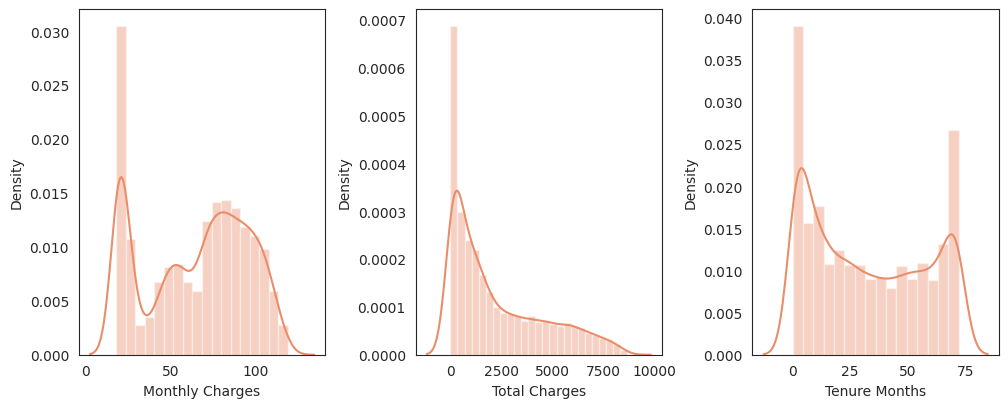

In [ ]:
# Visual exploration

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 4))
index = 0
axs = axs.flatten()
for k,v in df[var_num].items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

*   Variables categoricas




In [ ]:
result_df = pd.DataFrame(columns = ['Variable', 'Niveles', 'Moda'])

for i in range(len(var_cat)):
  df_check = df[var_cat[i]]
  new_row = pd.Series(
      [var_cat[i],
       df_check.nunique(),
       df_check.value_counts().index[0]
       ],
       index = ['Variable', 'Niveles', 'Moda']
  )

  result_df = result_df.append(new_row, ignore_index = True)

result_df.head(17)

,Variable,Niveles,Moda
0,City,1129,Los Angeles
1,Gender,2,Male
2,Senior Citizen,2,No
3,Partner,2,No
4,Dependents,2,No
5,Phone Service,2,Yes
6,Multiple Lines,3,No
7,Internet Service,3,Fiber optic
8,Online Security,3,No
9,Online Backup,3,No


In [ ]:
df[df['City'] == 'Los Angeles'].shape[0]/df.shape[0]

0.04330540962657958

In [ ]:
df['City'].value_counts()

Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Hood               4
Hoopa              4
Hopland            4
Hornbrook          4
Zenia              4
Name: City, Length: 1129, dtype: int64

In [ ]:
var_cat.remove('City')

In [ ]:
#Vemos los valores que toman algunas de las variables categoricas
for var in var_cat:
  unique_cases =df[var].unique()
  print(var)
  print(unique_cases)

Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Senior Citizen
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Partner
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Dependents
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Phone Service
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Multiple Lines
['No', 'Yes', 'No phone service']
Categories (3, object): ['No', 'No phone service', 'Yes']
Internet Service
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
Online Security
['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Online Backup
['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Device Protection
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Tech Support
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Streaming TV
['N

In [ ]:
df['Payment Method'] = df['Payment Method'].cat.rename_categories({'Bank transfer (automatic)':'Bank transfer'
                                            ,'Credit card (automatic)':'Credit card'})

<Figure size 700x500 with 0 Axes>

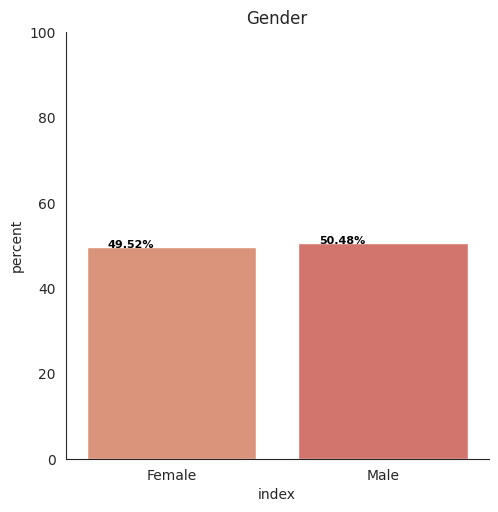

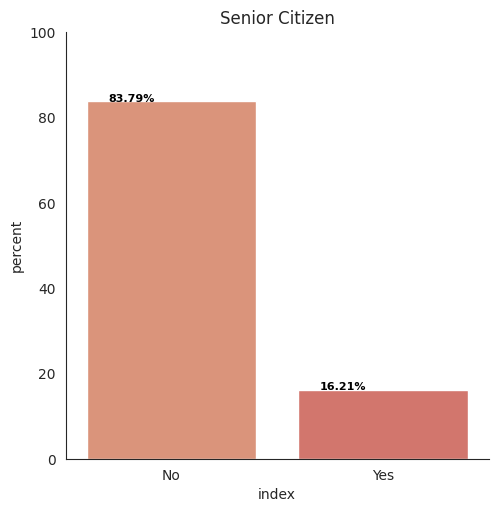

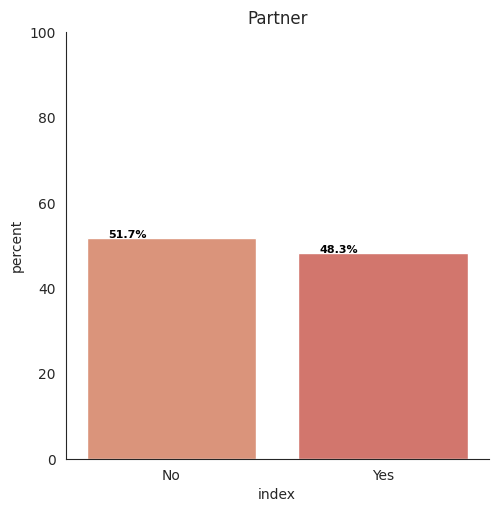

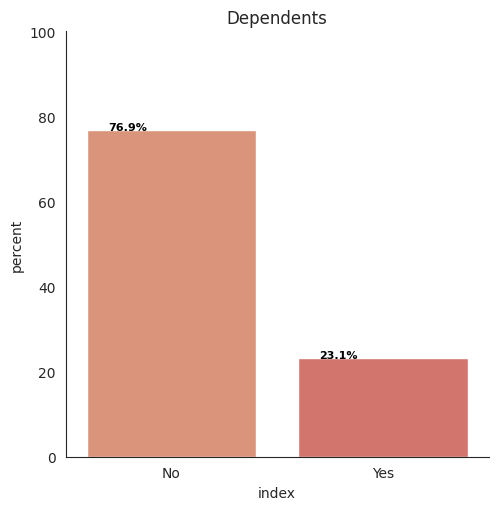

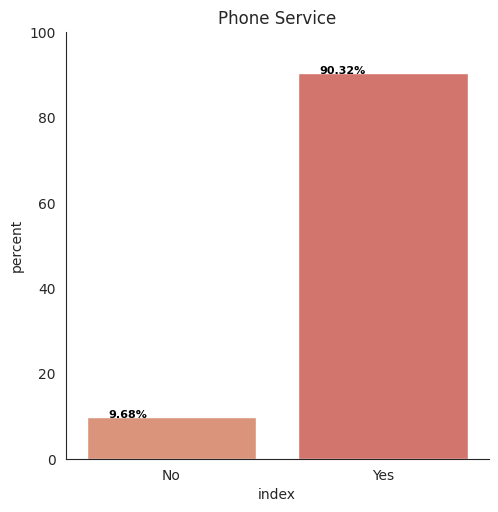

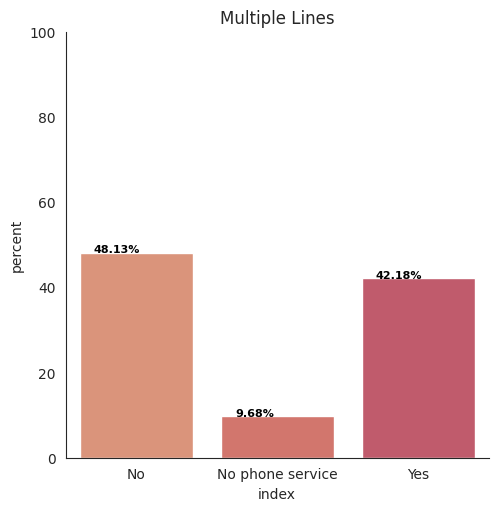

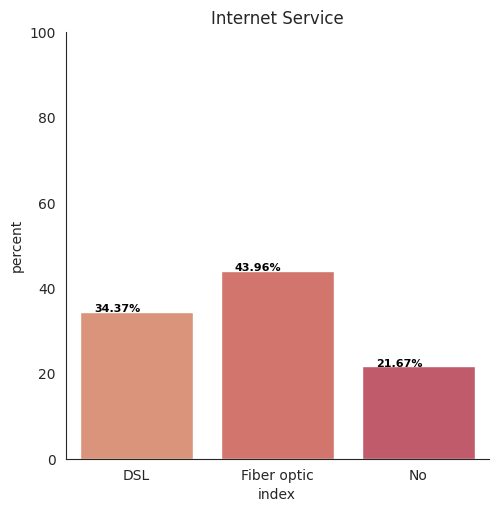

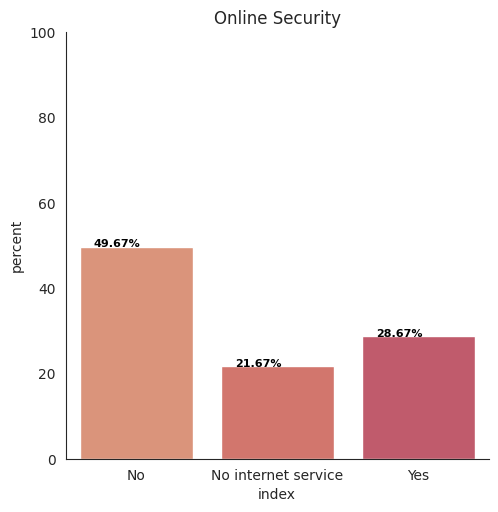

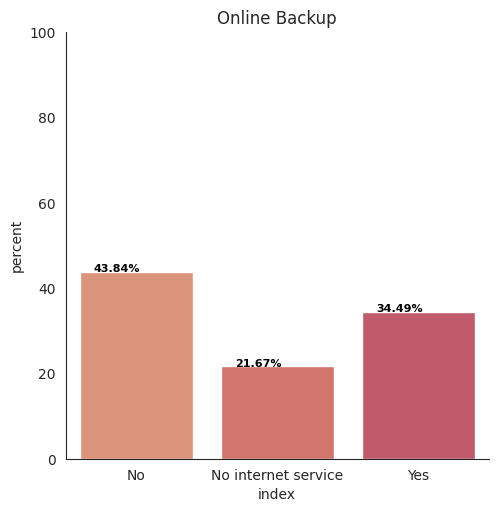

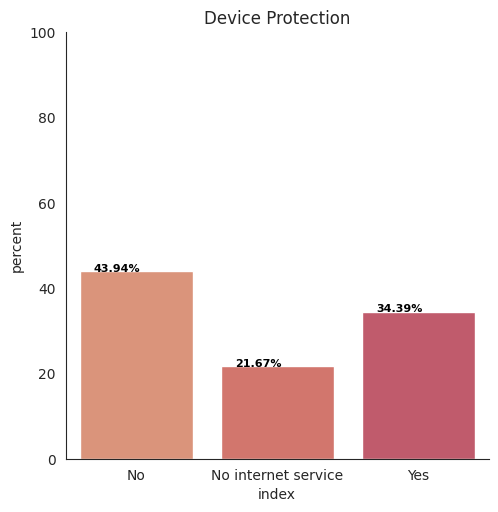

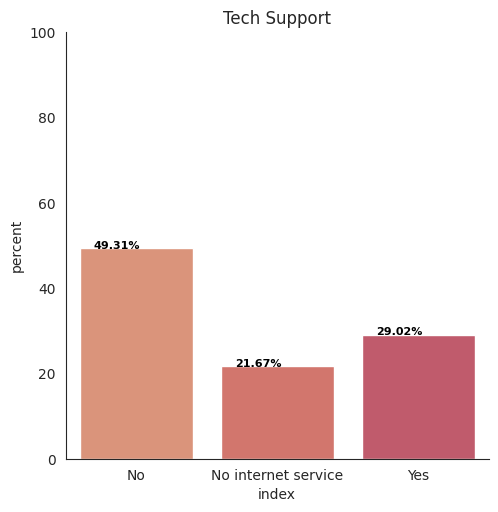

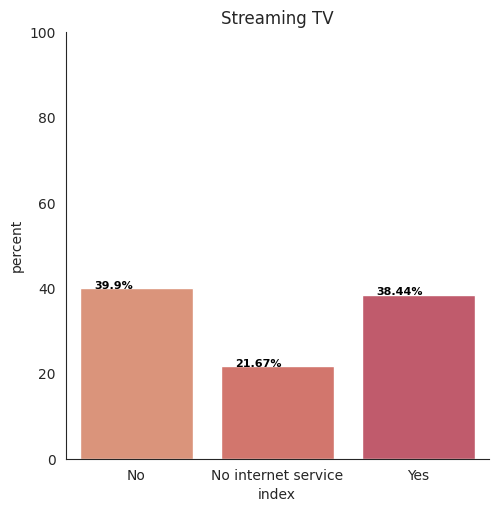

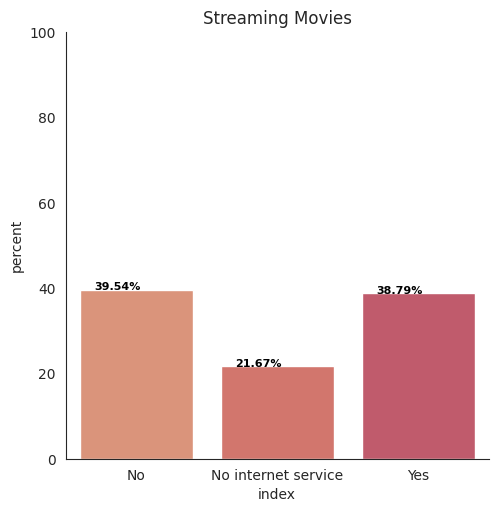

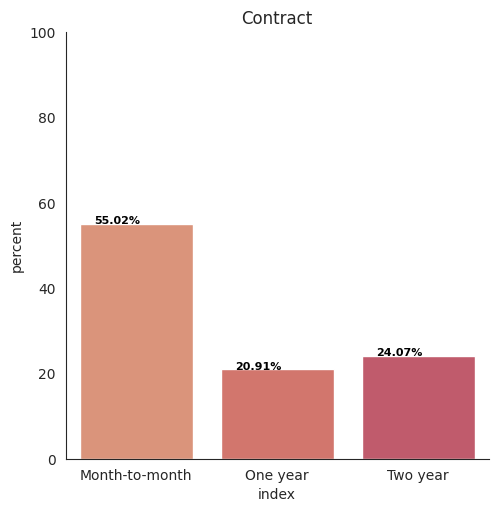

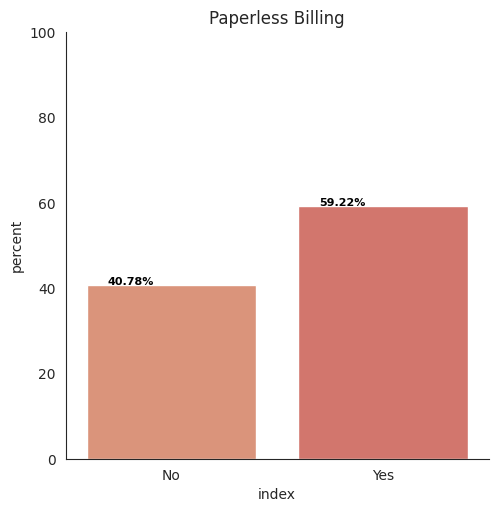

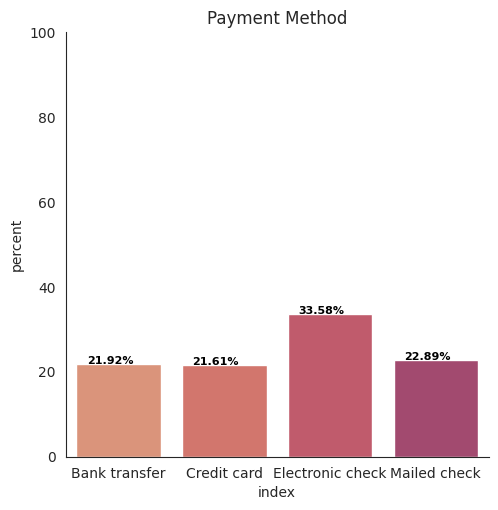

In [ ]:
## Exploración visual

# Plot categorical features
plt.figure(figsize=(7,5))
for i, var_name in enumerate(var_cat):
    df_aux = df[var_name].value_counts(normalize=True)
    df_aux = df_aux.mul(100)
    df_aux = df_aux.rename('percent').reset_index()
    ax=fig.add_subplot(16,1,i+1)

    # Contruyo el gráfico

    g = sns.catplot(x='index',y='percent', kind='bar',data=df_aux, ax=ax)
    g.ax.set_title(var_name)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
      txt = str(p.get_height().round(2)) + '%'
      txt_x = p.get_x()
      txt_y = p.get_height()
      g.ax.text(txt_x+0.1,txt_y,txt, color="black",
                    fontsize=8,
                    fontweight="bold")

    #opcional -> guardar el plot:
    #name = '{}_univ_plot.png'.format(var_name)
    #plt.savefig(name, bbox_inches="tight")


_**Summary**_

- [x] Respecto a la variable target, teniendo en cuanta el tamaño muestral, el desbalanceo puede llegar a ser un problema potencial
- [x] En las variables numéricas no se registran outliers (valores atípicos) y en todos los casos el coeficiente de variación supera el 30%, es decir, presentan dispersión suficiente para considerarlas en los sub-siguientes análisis
- [x] En cuanto a las variables categóricas, el campo "City" presenta alta cardinalidad (1129 valores distintos), esto hace que sea poco factible su uso, por lo tanto se la excluye de los subsiguientes análisis.

***¿Qué podemos decir de la cartera de clientes hasta ahora?***
El perfil es variado. Hay clientes muy nuevos y otros de mucha antiguedad. El punto de quiebre pareciera estar entorno al mes 5 dado el salto que se ve en la distribución de la variable 'Tenure Months'. Por otra parte, en general, el grueso de los clientes tiene una edad menor a los 65 años, no tiene personas a cargo y tienen contratado tando el servicio de telefonía como el de internet.

### Bivariados

#### Train-Test split

Antes de realizar un análisis bivariado, lo recomendable es separar la parte de los datos que se usará para medir la performance del modelo (train-test split)


In [ ]:
train_set, test_set = train_test_split(df_SC, test_size=0.2, random_state=42)

Al considerar un método de sampleo random, algunos checks adicionales son necesarios para evitar potenciales sesgos

In [ ]:
df_sum = pd.DataFrame(columns=['Feature', 'Mean_Train', 'Mean_Test'
                              ,'Median_Train', 'Median_Test'
                              ,'Min_Train', 'Min_Test'
                              ,'Max_Train', 'Max_Test'])

for i in df[var_num].columns:

    row = {
            'Feature': i,
            'Mean_Train': '{:.2f}'.format(np.mean(train_set[i])),
            'Mean_Test': '{:.2f}'.format(np.mean(test_set[i])),
            'Median_Train': '{:.2f}'.format(np.median(train_set[train_set[i].notnull()][i])),
            'Median_Test': '{:.2f}'.format(np.median(test_set[test_set[i].notnull()][i])),
            'Min_Train': '{:.2f}'.format(np.min(train_set[i])),
            'Min_Test': '{:.2f}'.format(np.min(test_set[i])),
            'Max_Train': '{:.2f}'.format(np.max(train_set[i])),
            'Max_Test': '{:.2f}'.format(np.max(test_set[i])),
            'Missings_Train' : '{:.2f}'.format(np.max(train_set[i].isna().sum())),
            'Missings_Test' : '{:.2f}'.format(np.max(test_set[i].isna().sum())),
        }

    df_sum = df_sum.append(row, ignore_index=True)

df_sum

,Feature,Mean_Train,Mean_Test,Median_Train,Median_Test,Min_Train,Min_Test,Max_Train,Max_Test,Missings_Train,Missings_Test
0,Monthly Charges,64.43,66.10,70.20,71.10,18.25,18.80,118.60,118.75,0.00,0.00
1,Total Charges,2280.04,2296.32,1388.00,1442.20,18.80,19.00,8684.80,8672.45,11.00,0.00
2,Tenure Months,32.43,32.12,29.00,28.00,0.00,1.00,72.00,72.00,0.00,0.00


In [ ]:
df_sum_train = pd.DataFrame(columns=['Feature', 'Category', '%_train'])
df_sum_test = pd.DataFrame(columns=['Feature', 'Category', '%_test'])
for i in df[var_cat].columns:
    df_aux_train = pd.DataFrame(train_set[i].value_counts(1)).reset_index().rename(
        columns={'index': 'Category', i:'%_train'})
    df_aux_train['Feature'] = i

    df_aux_test = pd.DataFrame(test_set[i].value_counts(1)).reset_index().rename(
    columns={'index': 'Category', i:'%_test'})
    df_aux_test['Feature'] = i

    df_sum_train = df_sum_train.append(df_aux_train, ignore_index=True)
    df_sum_test = df_sum_test.append(df_aux_test, ignore_index=True)

df_sum = pd.merge(df_sum_train, df_sum_test, how = 'inner', on = ['Feature', 'Category'])
df_sum['%_diff'] = df_sum['%_train'] - df_sum['%_test']
df_sum = df_sum.sort_values(by = ['Feature', 'Category'])
df_sum

,Feature,Category,%_train,%_test,%_diff
34,Contract,Month-to-month,0.54,0.57,-0.03
36,Contract,One year,0.21,0.21,0.01
35,Contract,Two year,0.24,0.22,0.02
6,Dependents,No,0.77,0.77,-0.00
7,Dependents,Yes,0.23,0.23,0.00
22,Device Protection,No,0.43,0.46,-0.03
24,Device Protection,No internet service,0.22,0.20,0.02
23,Device Protection,Yes,0.35,0.34,0.01
1,Gender,Female,0.49,0.51,-0.02
0,Gender,Male,0.51,0.49,0.02


In [ ]:
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

print('train_set target mean: ', np.round(train_set[target].mean(),2))
print('test_set target mean: ', np.round(test_set[target].mean(), 2))

train_set shape:  (5634, 26)
test_set shape:  (1409, 26)
train_set target mean:  Churn Value   0.26
dtype: float64
test_set target mean:  Churn Value   0.28
dtype: float64


##### **Stratified random sampling VS Simple rando sample**

  +info: https://www.freecodecamp.org/news/what-is-stratified-random-sampling-definition-and-python-example/

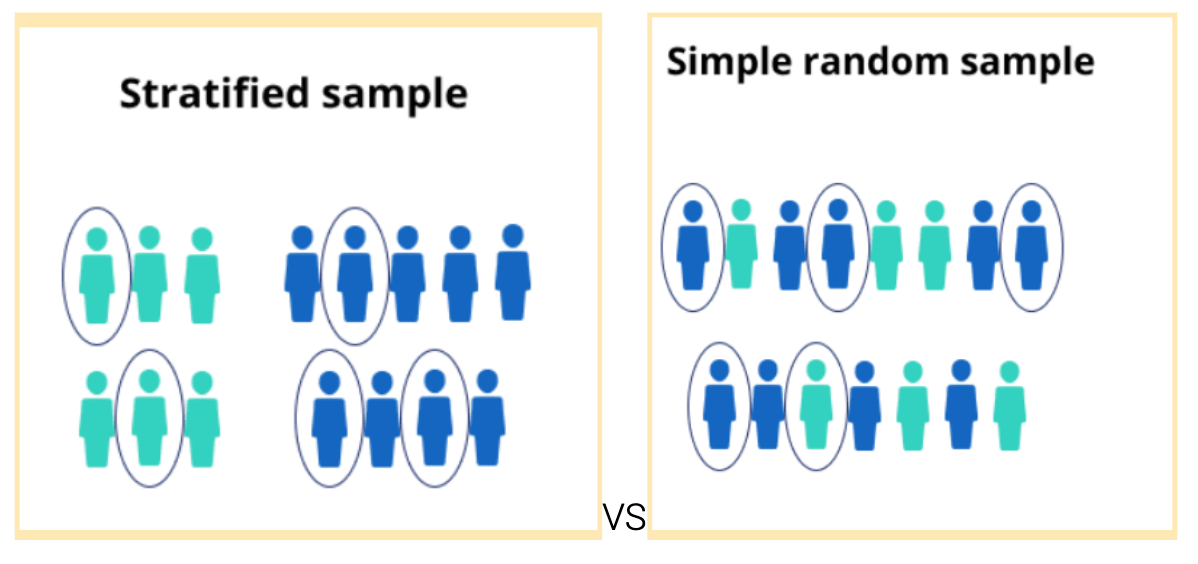

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Contract"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
strat_test_set["Contract"].value_counts() / len(strat_test_set)

Month-to-month   0.55
Two year         0.24
One year         0.21
Name: Contract, dtype: float64

In [ ]:
df["Contract"].value_counts() / len(df)

Month-to-month   0.55
Two year         0.24
One year         0.21
Name: Contract, dtype: float64

In [ ]:
test_set["Contract"].value_counts() / len(test_set)

Month-to-month   0.57
Two year         0.22
One year         0.21
Name: Contract, dtype: float64

#### Bivariate

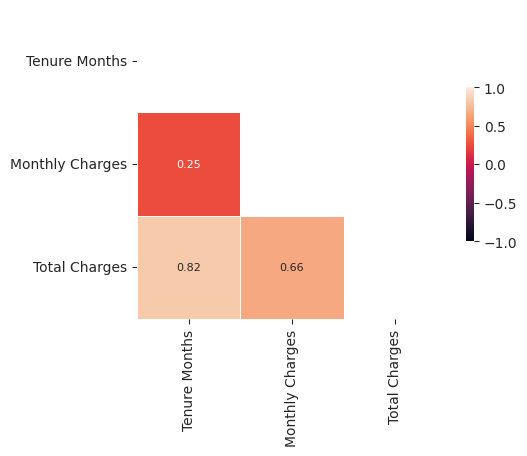

In [ ]:
# Correlation analysis
matrix_correlation = train_set.drop(target + var_geo, axis = 1).corr()

# Plot

mask = np.zeros_like(matrix_correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(5, 5))

heatmap = sns.heatmap(matrix_correlation,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      #cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks': [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True, annot_kws={"fontsize":8})


ax.set_yticklabels(matrix_correlation.columns, rotation = 0)
ax.set_xticklabels(matrix_correlation.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
matrix_correlation

,Tenure Months,Monthly Charges,Total Charges
Tenure Months,1.00,0.25,0.82
Monthly Charges,0.25,1.00,0.66
Total Charges,0.82,0.66,1.00


* Las variables *Tenure Months* y *Total Charges* están **altamente correlacionadas**. Se podría elegir solo una de las dos a la hora de modelar.

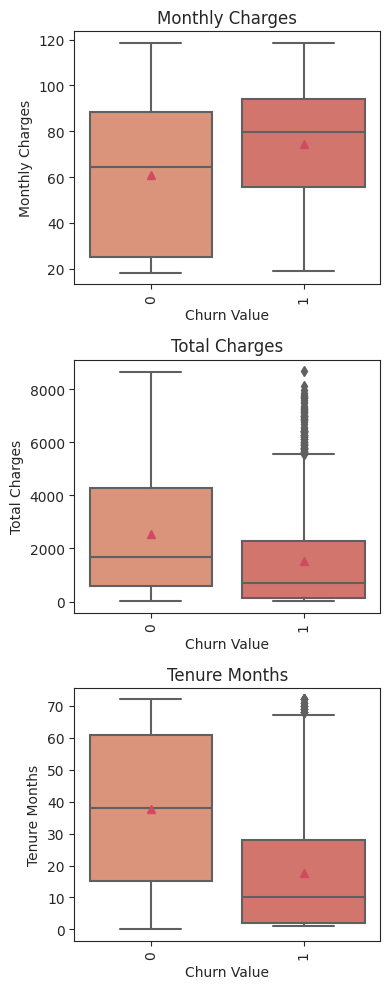

In [ ]:
# Visual exploration most important features vs target

# Exploramos visualmente la relacion entre las variables categoricas y la variable target

# Plot categorical features
fig=plt.figure(figsize=(4,10))
for i, var_name in enumerate(var_num):
    ax=fig.add_subplot(3,1,i+1)
    sns.boxplot(data=train_set, x=target[0], y=var_name, ax = ax, showmeans=True)
    ax.set_title(var_name)
    plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

In [1]:
## Exploración visual

# Plot categorical features
plt.figure(figsize=(7,5))
for i, var_name in enumerate(var_cat):
    cross_tab_prop = pd.crosstab(index=train_set[var_name],
    columns=train_set[target[0]],
    normalize="index")
    cross_tab_prop.sort_index().plot(kind='barh',
                        stacked=True,
                        #colormap='Greens',
                        figsize=(6, 4))

    plt.legend(['0', '1'],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('')
    plt.xlabel("%")
    plt.title(label=var_name,
              fontsize=10)

    for n, x in enumerate([*cross_tab_prop.sort_index().index.values]):
        for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                              cross_tab_prop.loc[x].cumsum()):

            plt.text(x=(y_loc - proportion) + (proportion / 3),
                    y=n - 0.01,
                    s=f'{np.round(proportion * 100, 1)}%',
                    color="black",
                    fontsize=8,
                    fontweight="bold")

    plt.show()

NameError: ignored

In [ ]:
# Check rápido para saber si quienes tienen contrato el servicio de telefonía también tienen contratado el servicio de internet
train_set.groupby('Phone Service')['Internet Service'].value_counts(1)

Phone Service  Internet Service
No             DSL                1.00
Yes            Fiber optic        0.48
               DSL                0.27
               No                 0.25
Name: Internet Service, dtype: float64

_**Summary**_

¿Qué podemos decir de lxs clientes que hacen churn?
- [x] Son clientes menores a 65 años en su mayoría y relativamente con poca antigüedad
- [x] Tienen contratado el servicio de internet (básico) sin servicios adicionales (tech support, device protection, online security, online backup) y con fibra óptica
- [x] El tipo de contrato predominante es el de month-to-month y el medio de pago es electronic check

#### Export

In [ ]:
train_set.to_csv('train_set_EDA.csv', index = False)
test_set.to_csv('test_set_EDA.csv', index = False)